Nama:

In [1]:
print("Hanun Masitha Ramadhani")

Hanun Masitha Ramadhani


In [30]:
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, AveragePooling2D

import pandas as pd

In [3]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
missing = []
persen = []

for i in df.columns:
    missing.append(df[i].isnull().sum())
    persen.append(df[i].isnull().sum()/len(df[i])*100)

proporsi_hilang = pd.DataFrame({
        'kolom' : df.columns,
        'missing' : missing,
        'persen_missing' : persen
})
    
proporsi_hilang

,kolom,missing,persen_missing
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Name,0,0.000000
4,Sex,0,0.000000
5,Age,177,19.865320
6,SibSp,0,0.000000
7,Parch,0,0.000000
8,Ticket,0,0.000000
9,Fare,0,0.000000


In [5]:
df = df.drop(['Cabin'], axis=1)

In [6]:
X_obj = df.select_dtypes('object')
X_num = df.select_dtypes('number')

In [7]:
import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
simple_imputer = imputer.fit_transform(X_obj)

simple_imputer = pd.DataFrame(simple_imputer)
simple_imputer.columns = X_obj.columns
X_obj['Embarked'] = simple_imputer['Embarked']

<ipython-input-7-02f343bbce22>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_obj['Embarked'] = simple_imputer['Embarked']


In [8]:
from sklearn.impute import KNNImputer

imputer_knn = KNNImputer(n_neighbors=5)
result_imputer = imputer_knn.fit_transform(X_num)
result_imputer = result_imputer.round()

result_imputer = pd.DataFrame(result_imputer)
result_imputer.columns = X_num.columns
X_num['Age'] = result_imputer['Age']

<ipython-input-8-a75fb07e36c1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num['Age'] = result_imputer['Age']


In [9]:
df = pd.concat([X_obj,X_num], axis=1)
df

,Name,Sex,Ticket,Embarked,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,"Braund, Mr. Owen Harris",male,A/5 21171,S,1,0,3,22.0,1,0,7.2500
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C,2,1,1,38.0,1,0,71.2833
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S,3,1,3,26.0,0,0,7.9250
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S,4,1,1,35.0,1,0,53.1000
4,"Allen, Mr. William Henry",male,373450,S,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S,887,0,2,27.0,0,0,13.0000
887,"Graham, Miss. Margaret Edith",female,112053,S,888,1,1,19.0,0,0,30.0000
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S,889,0,3,27.0,1,2,23.4500
889,"Behr, Mr. Karl Howell",male,111369,C,890,1,1,26.0,0,0,30.0000


(1) Split X dan y. y adalah kolom 'Survived'. Split trainset dan testset: testsize:0.2, stratify:y.

In [10]:
y = df['Survived']
x = df.drop(['Survived'], axis=1)

In [11]:
# Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2
)

print("Jumlah Data Train : {0}".format(len(X_train)))
print("Jumlah Data Test : {0}".format(len(X_test)))

Jumlah Data Train : 712
Jumlah Data Test : 179


In [12]:
X_train

,Name,Sex,Ticket,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
144,"Andrew, Mr. Edgardo Samuel",male,231945,S,145,2,18.0,0,0,11.5000
515,"Walker, Mr. William Anderson",male,36967,S,516,1,47.0,0,0,34.0208
278,"Rice, Master. Eric",male,382652,Q,279,3,7.0,4,1,29.1250
740,"Hawksford, Mr. Walter James",male,16988,S,741,1,23.0,0,0,30.0000
217,"Jacobsohn, Mr. Sidney Samuel",male,243847,S,218,2,42.0,1,0,27.0000
...,...,...,...,...,...,...,...,...,...,...
291,"Bishop, Mrs. Dickinson H (Helen Walton)",female,11967,C,292,1,19.0,1,0,91.0792
179,"Leonard, Mr. Lionel",male,LINE,S,180,3,36.0,0,0,0.0000
538,"Risien, Mr. Samuel Beard",male,364498,S,539,3,28.0,0,0,14.5000
825,"Flynn, Mr. John",male,368323,Q,826,3,32.0,0,0,6.9500


In [13]:
X_train_obj = X_train.select_dtypes('object')
X_train_num = X_train.select_dtypes('number')
X_train_num

,PassengerId,Pclass,Age,SibSp,Parch,Fare
144,145,2,18.0,0,0,11.5000
515,516,1,47.0,0,0,34.0208
278,279,3,7.0,4,1,29.1250
740,741,1,23.0,0,0,30.0000
217,218,2,42.0,1,0,27.0000
...,...,...,...,...,...,...
291,292,1,19.0,1,0,91.0792
179,180,3,36.0,0,0,0.0000
538,539,3,28.0,0,0,14.5000
825,826,3,32.0,0,0,6.9500


In [14]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=np.nan)
oe.fit(X_train_obj)
X_train_obj_transform = oe.transform(X_train_obj)

X_train_obj_transform = pd.DataFrame(X_train_obj_transform)
X_train_obj_transform.columns = X_train_obj.columns
X_train_obj_transform

,Name,Sex,Ticket,Embarked
0,27.0,1.0,92.0,2.0
1,670.0,1.0,374.0,2.0
2,536.0,1.0,395.0,1.0
3,282.0,1.0,64.0,2.0
4,310.0,1.0,114.0,2.0
...,...,...,...,...
707,72.0,0.0,51.0,0.0
708,375.0,1.0,473.0,2.0
709,546.0,1.0,348.0,2.0
710,201.0,1.0,367.0,1.0


In [15]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_train_transform = minmax_scaler.fit_transform(X_train_num)

X_train_transform = pd.DataFrame(X_train_transform)
X_train_transform.columns = X_train_num.columns
X_train_transform

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0.161798,0.5,0.2250,0.000,0.0,0.022447
1,0.578652,0.0,0.5875,0.000,0.0,0.066404
2,0.312360,1.0,0.0875,0.500,0.2,0.056848
3,0.831461,0.0,0.2875,0.000,0.0,0.058556
4,0.243820,0.5,0.5250,0.125,0.0,0.052700
...,...,...,...,...,...,...
707,0.326966,0.0,0.2375,0.125,0.0,0.177775
708,0.201124,1.0,0.4500,0.000,0.0,0.000000
709,0.604494,1.0,0.3500,0.000,0.0,0.028302
710,0.926966,1.0,0.4000,0.000,0.0,0.013565


In [16]:
X_train_concat = pd.concat([X_train_obj_transform,X_train_transform], axis=1)
X_train_concat

,Name,Sex,Ticket,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,27.0,1.0,92.0,2.0,0.161798,0.5,0.2250,0.000,0.0,0.022447
1,670.0,1.0,374.0,2.0,0.578652,0.0,0.5875,0.000,0.0,0.066404
2,536.0,1.0,395.0,1.0,0.312360,1.0,0.0875,0.500,0.2,0.056848
3,282.0,1.0,64.0,2.0,0.831461,0.0,0.2875,0.000,0.0,0.058556
4,310.0,1.0,114.0,2.0,0.243820,0.5,0.5250,0.125,0.0,0.052700
...,...,...,...,...,...,...,...,...,...,...
707,72.0,0.0,51.0,0.0,0.326966,0.0,0.2375,0.125,0.0,0.177775
708,375.0,1.0,473.0,2.0,0.201124,1.0,0.4500,0.000,0.0,0.000000
709,546.0,1.0,348.0,2.0,0.604494,1.0,0.3500,0.000,0.0,0.028302
710,201.0,1.0,367.0,1.0,0.926966,1.0,0.4000,0.000,0.0,0.013565


(3) Buat model neural network sebagai model klasifikasi. Tentukan jumlah lapisan hidden layer, jumlah  neuron pada hidden layer, regularisasi (batch normalization/dropout) optimal, dan jumlah epoch dengan cara trial and error (buat beberapa jenis model, pilih yang hasilnya terbaik).

In [17]:
import pylab as pl

def makeplot(history):
    pl.figure()

    pl.subplot(121)
    pl.ylim([0,1])
    pl.plot(history.history['accuracy'], label = "Train")
    pl.plot(history.history['val_accuracy'], label = "Validation")
    pl.legend()
    pl.title('Accuracy')

    pl.subplot(122)
    pl.ylim([0,1])
    pl.title('Loss')
    pl.plot(history.history['loss'], label = "Train")
    pl.plot(history.history['val_loss'], label = "Validation")
    pl.legend()


In [18]:
backend.clear_session()
import numpy as np
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

dl = Sequential()
dl.add(Dense(32, activation='relu', input_dim=X_train_concat.shape[1]))
dl.add(Dense(32, activation='relu'))
dl.add(Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(0.001)

dl.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'] )
history = dl.fit(X_train_concat, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
18/18 [==============================] - 4s 72ms/step - loss: 10.4756 - accuracy: 0.5272 - val_loss: 3.3861 - val_accuracy: 0.5734
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 1.9869 - accuracy: 0.5800 - val_loss: 1.0507 - val_accuracy: 0.5734
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 0.8924 - accuracy: 0.6011 - val_loss: 0.7556 - val_accuracy: 0.6014
Epoch 4/100
18/18 [==============================] - 0s 11ms/step - loss: 0.7765 - accuracy: 0.5694 - val_loss: 0.7201 - val_accuracy: 0.5524
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 0.7036 - accuracy: 0.5870 - val_loss: 0.7027 - val_accuracy: 0.6434
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6501 - accuracy: 0.6362 - val_loss: 0.6930 - val_accuracy: 0.5734
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6570 - accuracy: 0.6046 - val_loss: 0.6864 - val_accuracy: 0.6294
Epoch 8/10

18/18 [==============================] - 0s 5ms/step - loss: 0.5429 - accuracy: 0.7258 - val_loss: 0.6453 - val_accuracy: 0.6294
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5804 - accuracy: 0.6995 - val_loss: 0.5614 - val_accuracy: 0.7343
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6058 - accuracy: 0.7065 - val_loss: 0.5813 - val_accuracy: 0.6923
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5668 - accuracy: 0.7135 - val_loss: 0.5491 - val_accuracy: 0.7273
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5355 - accuracy: 0.7346 - val_loss: 0.5625 - val_accuracy: 0.7063
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5743 - accuracy: 0.7170 - val_loss: 0.7892 - val_accuracy: 0.6573
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6745 - accuracy: 0.6801 - val_loss: 0.7212 - val_accuracy: 0.6783
Epoch 65/100
18/18 

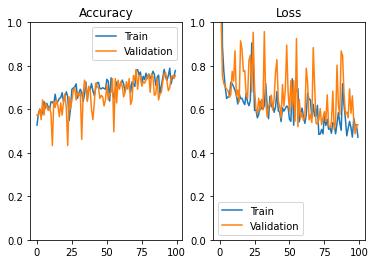

In [19]:
makeplot(history)

In [24]:
backend.clear_session()
import numpy as np
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

dl = Sequential()
dl.add(Dense(64, activation='relu', input_dim=X_train_concat.shape[1]))
dl.add(Dense(32, activation='relu'))
dl.add(Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(0.0001)

dl.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'] )
history = dl.fit(X_train_concat, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
18/18 [==============================] - 1s 23ms/step - loss: 30.9399 - accuracy: 0.6344 - val_loss: 31.2127 - val_accuracy: 0.5944
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 23.1332 - accuracy: 0.6344 - val_loss: 22.1536 - val_accuracy: 0.5944
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 15.3648 - accuracy: 0.6327 - val_loss: 13.3886 - val_accuracy: 0.5874
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 8.7494 - accuracy: 0.6116 - val_loss: 7.0385 - val_accuracy: 0.5874
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 4.8339 - accuracy: 0.5958 - val_loss: 3.9200 - val_accuracy: 0.5944
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 3.1664 - accuracy: 0.5782 - val_loss: 2.3725 - val_accuracy: 0.5944
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 2.0681 - accuracy: 0.5659 - val_loss: 1.5108 - val_accuracy: 0.5944
Epoch 

18/18 [==============================] - 0s 5ms/step - loss: 0.6284 - accuracy: 0.6485 - val_loss: 0.6439 - val_accuracy: 0.6154
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6428 - accuracy: 0.6485 - val_loss: 0.6742 - val_accuracy: 0.6503
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6423 - accuracy: 0.6485 - val_loss: 0.7925 - val_accuracy: 0.6084
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6320 - accuracy: 0.6766 - val_loss: 0.6438 - val_accuracy: 0.6434
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6072 - accuracy: 0.6854 - val_loss: 0.6539 - val_accuracy: 0.6224
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6148 - accuracy: 0.6731 - val_loss: 0.6625 - val_accuracy: 0.6713
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6144 - accuracy: 0.6626 - val_loss: 0.6659 - val_accuracy: 0.6364
Epoch 65/100
18/18 

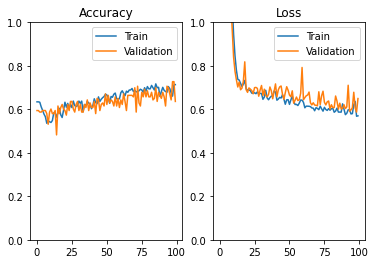

In [25]:
makeplot(history)

In [27]:
backend.clear_session()
import numpy as np
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

dl = Sequential()
dl.add(Dense(64, activation='relu', input_dim=X_train_concat.shape[1]))
dl.add(Dense(32, activation='relu'))
dl.add(Dropout(0.2))
dl.add(BatchNormalization())
dl.add(Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(0.001)

dl.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'] )
history = dl.fit(X_train_concat, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
18/18 [==============================] - 3s 66ms/step - loss: 0.8039 - accuracy: 0.5308 - val_loss: 0.8271 - val_accuracy: 0.5245
Epoch 2/100
18/18 [==============================] - 0s 12ms/step - loss: 0.7470 - accuracy: 0.5308 - val_loss: 0.7149 - val_accuracy: 0.5385
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 0.7194 - accuracy: 0.5554 - val_loss: 0.6757 - val_accuracy: 0.6154
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.7400 - accuracy: 0.5518 - val_loss: 0.7644 - val_accuracy: 0.5944
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 0.7007 - accuracy: 0.5940 - val_loss: 0.7481 - val_accuracy: 0.5944
Epoch 6/100
18/18 [==============================] - 0s 9ms/step - loss: 0.6977 - accuracy: 0.6011 - val_loss: 0.6683 - val_accuracy: 0.5944
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 0.7022 - accuracy: 0.5782 - val_loss: 0.6686 - val_accuracy: 0.5944
Epoch 8/100

18/18 [==============================] - 0s 7ms/step - loss: 0.6503 - accuracy: 0.6327 - val_loss: 0.6489 - val_accuracy: 0.5944
Epoch 59/100
18/18 [==============================] - 0s 10ms/step - loss: 0.6445 - accuracy: 0.6415 - val_loss: 0.6555 - val_accuracy: 0.5944
Epoch 60/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6524 - accuracy: 0.6151 - val_loss: 0.6479 - val_accuracy: 0.5944
Epoch 61/100
18/18 [==============================] - 0s 9ms/step - loss: 0.6527 - accuracy: 0.6151 - val_loss: 0.6504 - val_accuracy: 0.5944
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6516 - accuracy: 0.6327 - val_loss: 0.6537 - val_accuracy: 0.5944
Epoch 63/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6548 - accuracy: 0.6362 - val_loss: 0.6582 - val_accuracy: 0.5804
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 0.6434 - accuracy: 0.6450 - val_loss: 0.6670 - val_accuracy: 0.5594
Epoch 65/100
18/18

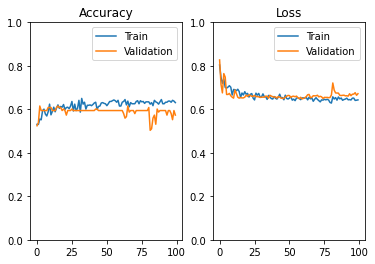

In [28]:
makeplot(history)

(4) Tentukan optimal  probability threshold untuk label 1 dengan menggunakan roc-auc curve atau precision-recall curve

In [55]:
backend.clear_session()
import numpy as np
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

dl = Sequential()
dl.add(Dense(128, activation='relu', input_dim=X_train_concat.shape[1]))
dl.add(Dense(64, activation='relu'))
dl.add(Dense(32, activation='relu'))
dl.add(Dense(16, activation='relu'))
dl.add(Dropout(0.3))
dl.add(BatchNormalization())
dl.add(Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(0.001)

dl.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'] )
history = dl.fit(X_train_concat, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
18/18 [==============================] - 3s 61ms/step - loss: 0.8406 - accuracy: 0.4886 - val_loss: 2.2483 - val_accuracy: 0.3986
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.7784 - accuracy: 0.5325 - val_loss: 1.0761 - val_accuracy: 0.3916
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.7694 - accuracy: 0.5536 - val_loss: 0.9013 - val_accuracy: 0.3916
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 0.7490 - accuracy: 0.5220 - val_loss: 0.7726 - val_accuracy: 0.4545
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 0.7266 - accuracy: 0.5606 - val_loss: 0.7056 - val_accuracy: 0.5594
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 0.7050 - accuracy: 0.5624 - val_loss: 0.7025 - val_accuracy: 0.5734
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 0.7261 - accuracy: 0.5554 - val_loss: 0.6843 - val_accuracy: 0.6084
Epoch 8/100


Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.6450 - val_loss: 0.6705 - val_accuracy: 0.5944
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6531 - accuracy: 0.6397 - val_loss: 0.6673 - val_accuracy: 0.5944
Epoch 61/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6589 - accuracy: 0.6397 - val_loss: 0.6669 - val_accuracy: 0.5944
Epoch 62/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6561 - accuracy: 0.6204 - val_loss: 0.6640 - val_accuracy: 0.5944
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6495 - accuracy: 0.6344 - val_loss: 0.6657 - val_accuracy: 0.5944
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 0.6536 - accuracy: 0.6292 - val_loss: 0.6687 - val_accuracy: 0.5944
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6468 - accuracy: 0.6344 - val_loss: 0.6680 - val_accuracy: 0.5944
Epoch 

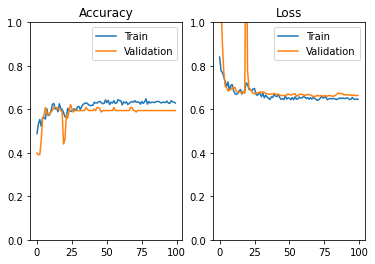

In [56]:
makeplot(history)

(5) Print classification report dari model neural network yang telah Anda buat.

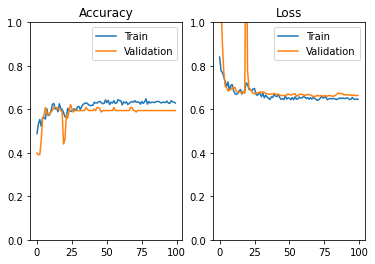

In [57]:
makeplot(history)